## Results analysis

In [1]:
import os
import numpy
import pandas
import matplotlib.pyplot as plotter
import scipy
from scipy.stats import *

In [2]:
#os.listdir(".")

In [3]:
results = os.listdir("results/")

In [4]:
results

['lin100_app_change__error.npy',
 'nn2_50_anomaly__error.npy',
 'nn2_100_anomaly__error.npy',
 'lin2_anomaly__error.npy',
 'nn2_10_net_flood__error.npy',
 'gru2_20_app_change__error.npy',
 'nn2_5_app_change__error.npy',
 'lin10_app_change__error.npy',
 'nn2_50_app_change__error.npy',
 'nn1_2_diff_app__error.npy',
 'nn3_2_app_change__error.npy',
 'lin100_normal__error.npy',
 'nn1_5_net_flood__error.npy',
 'nn1_100_app_change__error.npy',
 'nn2_100_app_change__error.npy',
 'nn3_10_app_change__error.npy',
 'gru2_100_net_flood__error.npy',
 'nn1_100_diff_app__error.npy',
 'nn2_20_net_flood__error.npy',
 'gru1_5_net_flood__error.npy',
 'nn1_5_anomaly__error.npy',
 'gru1_50_diff_app__error.npy',
 'nn2_10_diff_app__error.npy',
 'nn2_100_normal__error.npy',
 'nn3_50_app_change__error.npy',
 'nn3_2_diff_app__error.npy',
 'gru1_200_normal__error.npy',
 'gru2_100_normal__error.npy',
 'nn3_20_normal__error.npy',
 'gru1_50_normal__error.npy',
 'nn1_100_normal__error.npy',
 'gru1_20_anomaly__error.n

In [5]:
#arr = numpy.load("results/lin2_anomaly__error.npy")
arr = numpy.load("results/lin10_diff_app__error.npy")
ref = numpy.load("results/lin10_normal__error.npy")
ano = numpy.load("results/lin10_anomaly__error.npy")
arr = numpy.hstack([ref, arr, arr,ref,ref,ref,ref,ref,ref,ref])

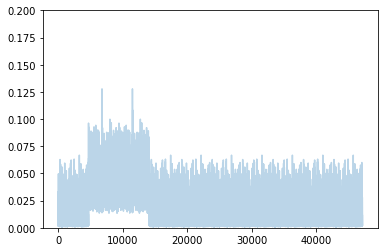

In [6]:
plotter.plot(arr, alpha=0.3)
plotter.ylim(0,0.2)
plotter.show()

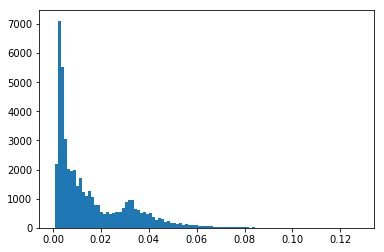

In [7]:
plotter.hist(arr,bins=100)
plotter.show()

In [8]:
a, b, s, k = beta.fit(arr)

/home/adityas/miniconda3/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:412: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


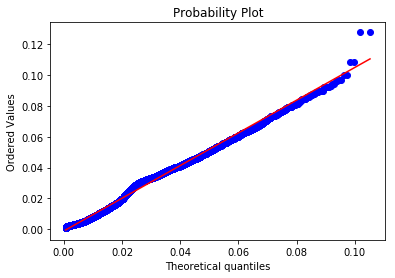

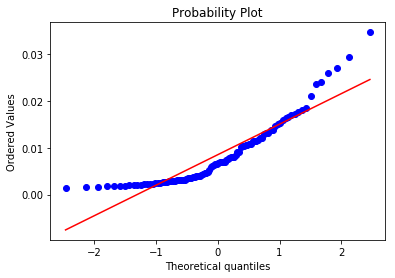

In [9]:
probplot(arr, dist='beta', sparams=(a, b, s, k), plot=plotter)
plotter.show()
probplot(arr[100:200], dist='norm', plot=plotter)
plotter.show()

In [10]:
c = numpy.cumsum(arr)
c

array([  4.52675847e-03,   7.79408245e-03,   1.04453081e-02, ...,
         7.43543505e+02,   7.43546464e+02,   7.43557621e+02])

In [11]:
r = numpy.arange(c.shape[0]+1)[1:]

In [12]:
r.shape

(47190,)

In [13]:
c.shape

(47190,)

In [66]:
class OnlineStats:
    
    def __init__(self, k=3, th=None):
        self.mean = 0
        self.count = 0
        self.std = 0.0
        self.k = k
        self.S = 1.0
        
        if th == None:
            self.th = 1.0/(k**2)
        else:
            self.th = th
    
    def consume(self, data):
        anomaly = 0
        self.count += 1
        
        mean = self.mean
        
        if self.count > 1:
            if data > self.bound:
                anomaly = 1
                data = self.bound
                #return anomaly
        
        self.mean = self.mean + ((data - self.mean)/self.count)
        
        if self.count > 1:
            self.S = self.S + (data - mean)*(data - self.mean)
            self.std = numpy.sqrt((self.S/self.count))
            
        self.bound = self.mean + (self.k * self.std)
            
        return anomaly
    
    def get_state(self):
        return (self.mean, self.std, self.bound)
            

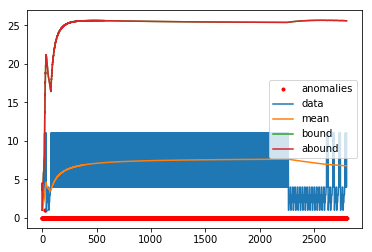

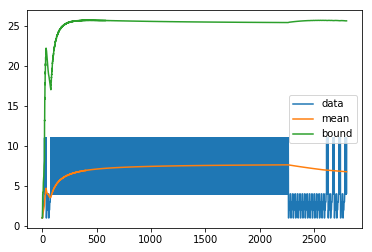

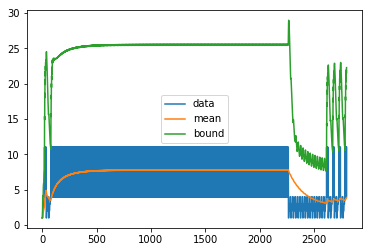

In [67]:
a = numpy.array([1,1,1,1,2,2,2,2,2,2,3,3,3,3,3,3,4,4,4,4,4,4,11,4,
                 11,4,11,4,11,4,11,4,11,4,11,4,11, 
                 1,1,1,1,2,2,2,2 ,2,2,3,3,3,3,3,3,4,4,4,4,4,4, 1,1,1,1,2,2,2,2,2,2,3,3,3,3,3,3,4,4,4,4,4,4,
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                 11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                 11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                 11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                 11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                 11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                 11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                 11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                 11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                 11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                 11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                 11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                11,4,11,4,11,4,11,4,11,4,11,4,11, 
                1,1,1,1,2,2,2,2 ,2,2,3,3,3,3,3,3,4,4,4,4,4,4, 1,1,1,1,2,2,2,2,2,2,3,3,3,3,3,3,4,4,4,4,4,4,
                1,1,1,1,2,2,2,2 ,2,2,3,3,3,3,3,3,4,4,4,4,4,4, 1,1,1,1,2,2,2,2,2,2,3,3,3,3,3,3,4,4,4,4,4,4,
                1,1,1,1,2,2,2,2 ,2,2,3,3,3,3,3,3,4,4,4,4,4,4, 1,1,1,1,2,2,2,2,2,2,3,3,3,3,3,3,4,4,4,4,4,4,
                1,1,1,1,2,2,2,2 ,2,2,3,3,3,3,3,3,4,4,4,4,4,4, 1,1,1,1,2,2,2,2,2,2,3,3,3,3,3,3,4,4,4,4,4,4,
                1,1,1,1,2,2,2,2 ,2,2,3,3,3,3,3,3,4,4,4,4,4,4, 1,1,1,1,2,2,2,2,2,2,3,3,3,3,3,3,4,4,4,4,4,4,
                1,1,1,1,2,2,2,2 ,2,2,3,3,3,3,3,3,4,4,4,4,4,4, 1,1,1,1,2,2,2,2,2,2,3,3,3,3,3,3,4,4,4,4,4,4,
                1,1,1,1,2,2,2,2 ,2,2,3,3,3,3,3,3,4,4,4,4,4,4, 1,1,1,1,2,2,2,2,2,2,3,3,3,3,3,3,4,4,4,4,4,4,
                1,1,1,1,2,2,2,2 ,2,2,3,3,3,3,3,3,4,4,4,4,4,4, 1,1,1,1,2,2,2,2,2,2,3,3,3,3,3,3,4,4,4,4,4,4,
                11,4,11,4,11,4,11,4,11,4,11,4,11,
                 1,1,1,1,2,2,2,2 ,2,2,3,3,3,3,3,3,4,4,4,4,4,4, 1,1,1,1,2,2,2,2,2,2,3,3,3,3,3,3,4,4,4,4,4,4,
                11,4,11,4,11,4,11,4,11,4,11,4,11,
                 1,1,1,1,2,2,2,2 ,2,2,3,3,3,3,3,3,4,4,4,4,4,4, 1,1,1,1,2,2,2,2,2,2,3,3,3,3,3,3,4,4,4,4,4,4,
                11,4,11,4,11,4,11,4,11,4,11,4,11,
                 1,1,1,1,2,2,2,2 ,2,2,3,3,3,3,3,3,4,4,4,4,4,4, 1,1,1,1,2,2,2,2,2,2,3,3,3,3,3,3,4,4,4,4,4,4,
                11,4,11,4,11,4,11,4,11,4,11,4,11])

detector = OnlineStats(k=5)

anomalies = numpy.zeros(a.shape[0])
means = numpy.zeros(a.shape[0])
stds = numpy.zeros(a.shape[0])
bound = numpy.zeros(a.shape[0])

for i in range(a.shape[0]):
    anomalies[i] = detector.consume(a[i])
    means[i], stds[i],bound[i] = detector.get_state()
    
#print(anomalies)

plotter.plot(anomalies,'r.' ,label="anomalies")
plotter.plot(a, label="data")
plotter.plot(means, label="mean")
plotter.plot(means + (5.0 * stds), label = "bound")
plotter.plot(bound, label = "abound")
plotter.legend()
plotter.show()

plotter.plot(a, label="data")
mean = pandas.Series(a).expanding().mean()
plotter.plot(mean , label="mean")
plotter.plot( mean + pandas.Series(a).expanding().std()*5.0, label="bound")
plotter.legend()
plotter.show()

plotter.plot(a, label="data")
mean = pandas.Series(a).ewm(halflife=100).mean()
plotter.plot(mean , label="mean")
plotter.plot( mean + pandas.Series(a).ewm(halflife=10).std()*5.0, label="bound")
plotter.legend()
plotter.show()

In [65]:
arr = pandas.Series(arr)
#means = numpy.mean(ref) * numpy.ones(arr.shape[0])
#median = arr.median()
#std = numpy.std(ref) * numpy.ones(arr.shape[0])
#means = arr.expanding().mean()
#std = arr.expanding().std()

#window = numpy.array([i/3000.0 for i in range(3001)])

means = arr.ewm(halflife=17280).mean()
std = arr.ewm(halflife=17280).std()
outlier = (arr > (means + 5.0 * std)) * 1.0

mark = numpy.zeros(arr.shape[0])

window = 100

for i in range(outlier.shape[0] - window):
    num = window
    outliers = numpy.sum(outlier[i:i+window])
    per = outliers/num
    if per > 0.04:
        mark[i+window] = 1.0
    else:
        mark[i+window] = 0.0
        
print(mark)
#print(per_outliers)
#print(num_outliers)

[ 0.  0.  0. ...,  0.  0.  0.]


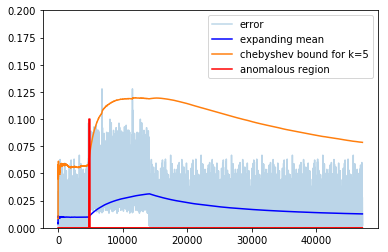

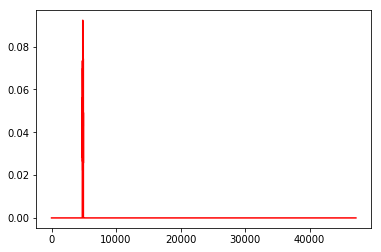

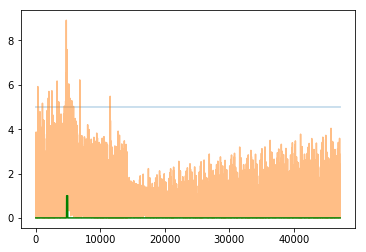

In [15]:
plotter.plot(arr, alpha=0.3, label="error")
plotter.plot(means,'b-', alpha=1, label="expanding mean")
plotter.plot(means + 5.0 * std, label="chebyshev bound for k=5")
#plotter.plot(means - 5.0 * std, label="chebyshev lbound for k=5")
plotter.plot(numpy.array(mark)*0.1,'r-', label="anomalous region")
plotter.legend()
plotter.ylim(0,0.2)
plotter.show()
plotter.plot(numpy.array(mark)*arr,'r-')
plotter.show()


z = (arr - means).abs() / std
outliers = (z > 5.0 * std)
mark = numpy.zeros(arr.shape[0])

window = 100

for i in range(outlier.shape[0] - window):
    num = window
    outliers = numpy.sum(outlier[i:i+window])
    per = outliers/num
    if per > 0.04:
        mark[i+window] = 1.0
    else:
        mark[i+window] = 0.0

plotter.plot(numpy.ones(z.shape[0])*5.0, alpha=0.3)
plotter.plot(z, alpha=0.5)
plotter.plot(mark,'g-')
plotter.show()

In [474]:
arr = pandas.Series(arr)

In [475]:
rolling_mean = arr.ewm(halflife=100).mean()
rolling_sigma = arr.ewm(halflife=100).std()